# Exploratory Data Analysis (EDA): Social Media Virality
This notebook performs initial EDA on the viral social media dataset.

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [6]:
# Step 2: Load Dataset
df = pd.read_csv('data/Cleaned_Viral_Social_Media_Trends.csv')  
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


## Initial Inspection

In [7]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Post_Date         5000 non-null   object
 2   Platform          5000 non-null   object
 3   Hashtag           5000 non-null   object
 4   Content_Type      5000 non-null   object
 5   Region            5000 non-null   object
 6   Views             5000 non-null   int64 
 7   Likes             5000 non-null   int64 
 8   Shares            5000 non-null   int64 
 9   Comments          5000 non-null   int64 
 10  Engagement_Level  5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
count,5000,5000,5000,5000,5000,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000
unique,5000,729,4,10,6,8,NaN,NaN,NaN,NaN,3
top,Post_1,2023-10-16,YouTube,#Fitness,Live Stream,USA,NaN,NaN,NaN,NaN,Low
freq,1,17,1324,536,855,677,NaN,NaN,NaN,NaN,1729
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.494066e+06,251475.029800,50519.562000,24888.393800,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.459490e+06,144349.583384,29066.362671,14284.504319,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.266000e+03,490.000000,52.000000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.186207e+06,126892.250000,25029.000000,12305.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.497373e+06,249443.000000,50839.500000,25004.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.759781e+06,373970.750000,75774.250000,37072.750000,NaN


## Initial Visualizations

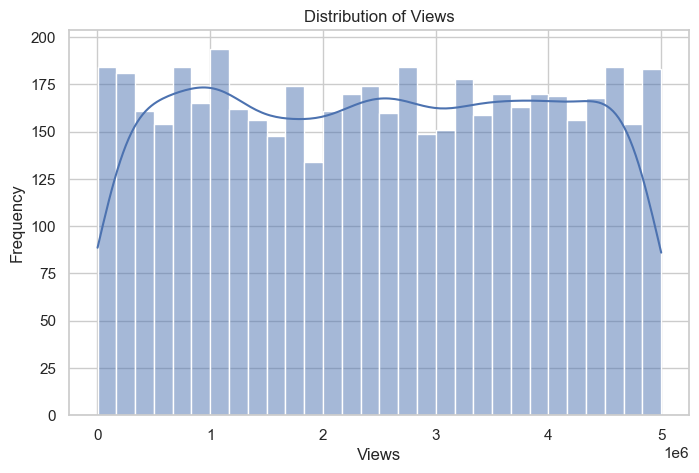

In [8]:
# Distribution of Views
plt.figure(figsize=(8, 5))
sns.histplot(df['Views'], bins=30, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

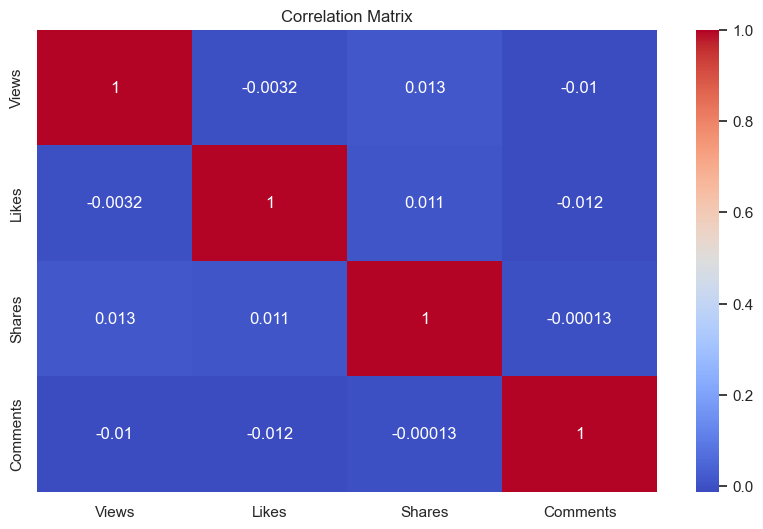

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 1. What is Exploratory Data Analysis (EDA)?
Exploratory Data Analysis (EDA) is the process of analyzing data sets to summarize their main characteristics using visual methods and statistical techniques. It helps uncover patterns, spot anomalies, and check assumptions with the aid of graphs, plots, and summary statistics.

**Sources:**
- Tukey, J. W. (1977). *Exploratory Data Analysis*. Addison-Wesley.
- [Wikipedia on EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

## 2. Why is EDA Essential in a Data Science or Analytics Project?
EDA is crucial for understanding the structure, distribution, and relationships in the dataset before applying machine learning algorithms. It helps in:
- Validating data quality
- Identifying relevant features
- Detecting outliers or anomalies
- Choosing the right modeling techniques

**Sources:**
- [Towards Data Science on EDA](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

## 3. EDA Techniques Used in This Project
- Histograms and boxplots for numerical distributions
- Bar charts for categorical frequency
- Correlation matrix to examine multicollinearity
- Time-series analysis on post engagement metrics

## 4. Jupyter Environment
I am running my Jupyter notebook inside **Visual Studio Code** using the built-in Python extension. VS Code provides an integrated environment that allows code editing, markdown formatting, and GitHub integration within a single interface.

## 5. Steps in My EDA Process
1. Data Acquisition
2. Initial Inspection of Columns and DTypes
3. Descriptive Statistics
4. Visualizations (histograms, boxplots, bar charts)
5. Missing Value Analysis
6. Outlier Detection
7. Feature Distribution by Category

## 6. Hardest Part About Getting Started
The most challenging part was ensuring the dataset was fully cleaned and formatted properly before EDA could begin. Minor issues such as missing column headers, mixed data types, and inconsistent formatting had to be resolved.